In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [4]:
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
gdp_df.info()

# columns: 4; rows: 7176

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


In [5]:
# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
drop_gdp_df=gdp_df.drop(columns=['Value Footnotes'])
gdp_df=drop_gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2019     2065.036235
2     Afghanistan  2018     2033.804389
3     Afghanistan  2017     2058.400221
4     Afghanistan  2016     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1994     2603.927369
7172     Zimbabwe  1993     2420.092791
7173     Zimbabwe  1992     2437.152908
7174     Zimbabwe  1991     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


In [6]:
# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 
#countries = gdp_df['Country'].unique()
missing = gdp_df.isnull()
print(missing)

      Country   Year  GDP_Per_Capita
0       False  False           False
1       False  False           False
2       False  False           False
3       False  False           False
4       False  False           False
...       ...    ...             ...
7171    False  False           False
7172    False  False           False
7173    False  False           False
7174    False  False           False
7175    False  False           False

[7176 rows x 3 columns]


In [7]:
# 8. Create some plots to show the distribution of GDP per capita for the year 2020
gdp2020_df = gdp_df[gdp_df['Year'] == 2020]

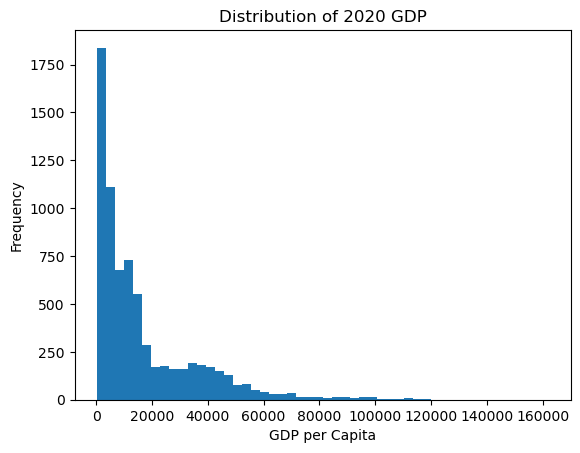

In [8]:
# histogram
gdp_per_capita = gdp_df['GDP_Per_Capita']
num_bins = 50
plt.hist(gdp_per_capita, bins=num_bins)
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.title('Distribution of 2020 GDP')
plt.show()

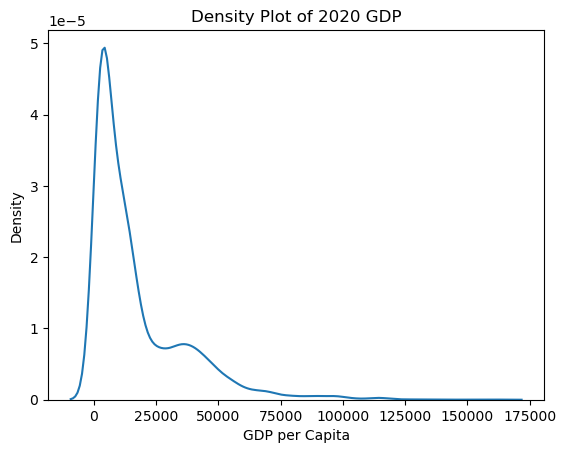

In [9]:
# density plot
gdp_per_capita = gdp_df['GDP_Per_Capita']
sns.kdeplot(gdp_per_capita)
plt.xlabel('GDP per Capita')
plt.title('Density Plot of 2020 GDP')
plt.show()

C:\Users\dmcad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


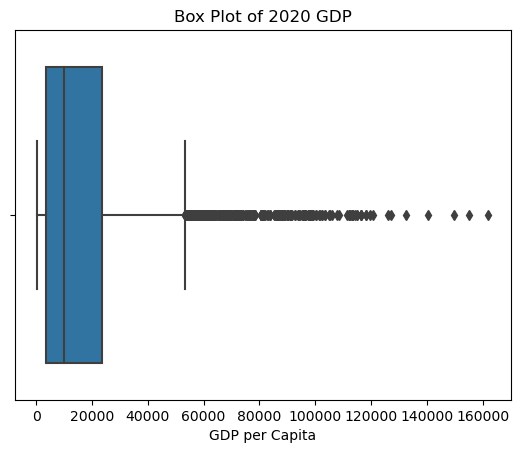

In [10]:
# boxplot
sns.boxplot(gdp_per_capita)
plt.xlabel('GDP per Capita')
plt.title('Box Plot of 2020 GDP')
plt.show()

C:\Users\dmcad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


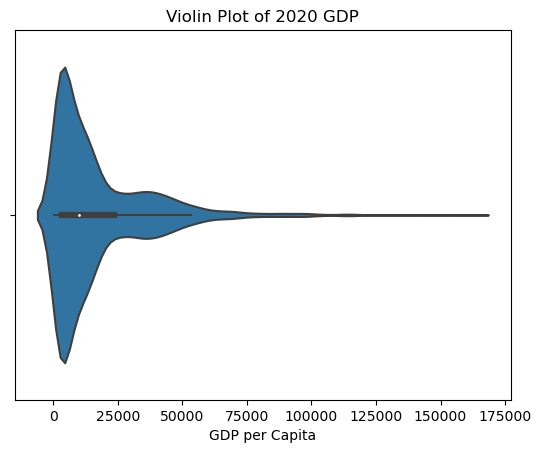

In [11]:
# violin plot
sns.violinplot(gdp_per_capita)
plt.xlabel('GDP per Capita')
plt.title('Violin Plot of 2020 GDP')
plt.show()

In [12]:
# 9. What was the median GDP per capita value in 2020?
gdp2020_df['GDP_Per_Capita'].mean()

19496.88171245749

In [13]:
#10. compare GDP per capita values for the years 1990, 2000, 2010, and 2020
subset_years = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df[gdp_df['Year'].isin(subset_years)]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
10                    Afghanistan  2010     1957.029070
19    Africa Eastern and Southern  2020     3491.978104
29    Africa Eastern and Southern  2010     3545.205203
39    Africa Eastern and Southern  2000     2915.472987
...                           ...   ...             ...
7144                       Zambia  1990     2190.181724
7145                     Zimbabwe  2020     2134.555461
7155                     Zimbabwe  2010     1813.531764
7165                     Zimbabwe  2000     2771.060576
7175                     Zimbabwe  1990     2652.129209

[918 rows x 3 columns]


<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

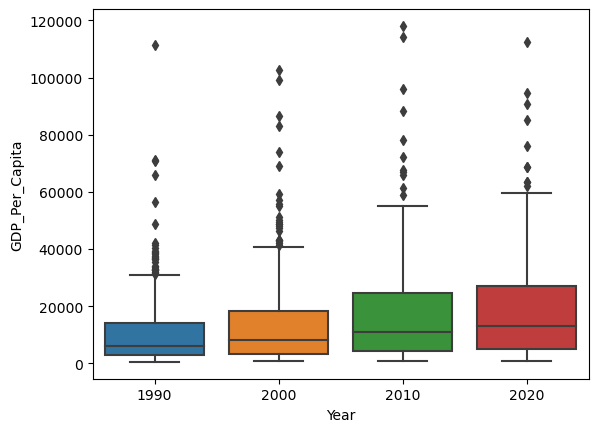

In [14]:
# boxplot
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

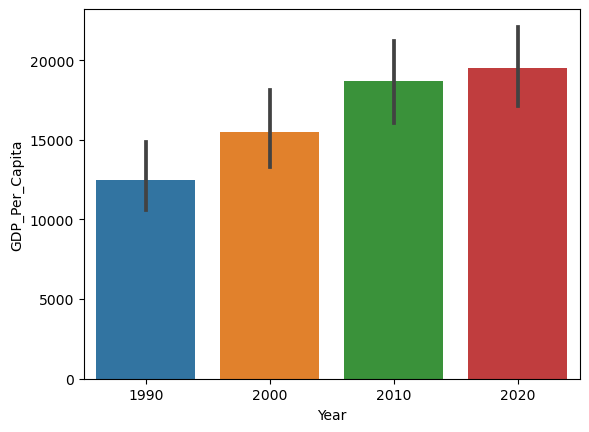

In [15]:
# barplot
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

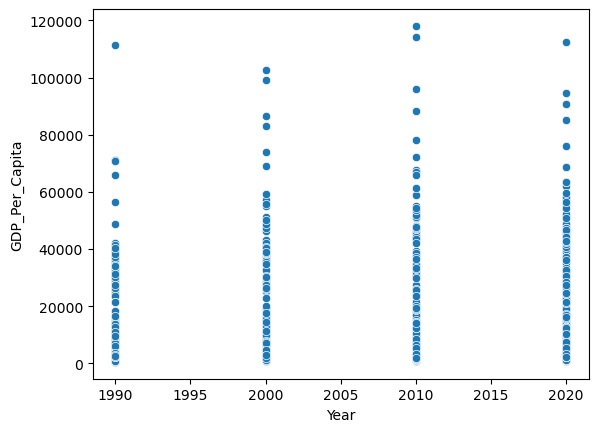

In [16]:
# Scatterplot
sns.scatterplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

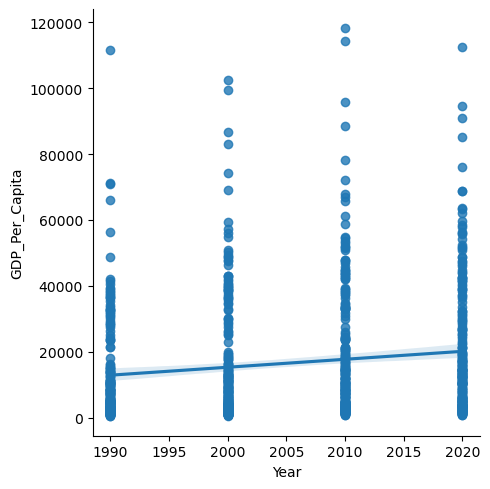

In [17]:
# scatterplot with trend line
sns.lmplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

In [18]:
#11. Which country was the first to have a GDP per capita greater than $100,000? 
high_gdp_df = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
first_country_df = high_gdp_df.groupby('Country')['Year'].min()
print(first_country_df)

# United Arab Emirates

Country
Luxembourg              2001
Macao SAR, China        2010
United Arab Emirates    1990
Name: Year, dtype: int64


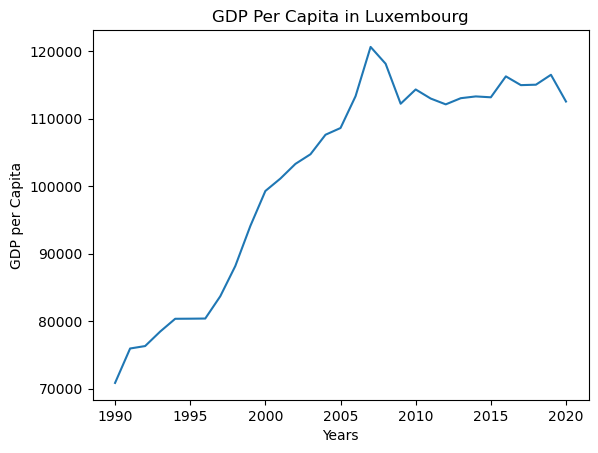

In [28]:
#12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

highest_gdp_2020 = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]
highest_gdp2020id = highest_gdp_2020['Country']
highest_gdp2020_journey = gdp_df[gdp_df['Country'] == highest_gdp2020id]

plt.plot(highest_gdp2020_journey['Year'], highest_gdp2020_journey['GDP_Per_Capita'])
plt.title('GDP Per Capita in ' + str(highest_gdp2020id))
plt.xlabel('Years')
plt.ylabel('GDP per Capita')
plt.show()


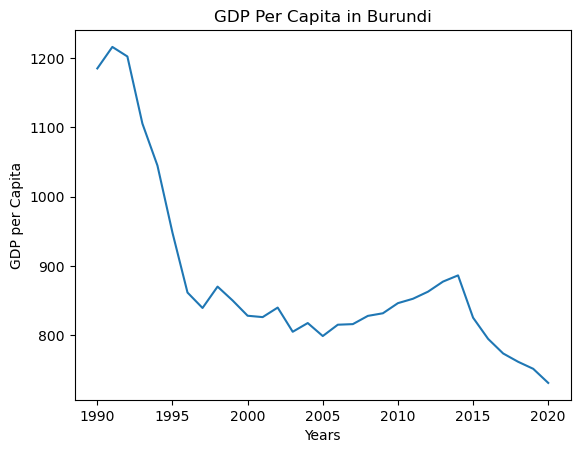

In [27]:
# 13. Which country had the lowest GDP per capita in 2020
lowest_gdp2020 = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmin()]
lowest_gdp2020id = lowest_gdp2020['Country']
lowest_gdp2020_journey = gdp_df[gdp_df['Country'] == lowest_gdp2020id]

plt.plot(lowest_gdp2020_journey['Year'], lowest_gdp2020_journey['GDP_Per_Capita'])
plt.title('GDP Per Capita in ' + str(lowest_gdp2020id))
plt.xlabel('Years')
plt.ylabel('GDP per Capita')
plt.show()

In [63]:
# **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
gdp_1990 = gdp_df[gdp_df['Year'] == 1990]

gdp_drop1990 = gdp_1990.drop(columns=['Year'])
gdp_label1990 = gdp_drop1990.rename(columns={'GDP_Per_Capita':'1990 GDP'})

gdp_drop2020 = gdp_2020.drop(columns=['Year'])
gdp_label2020 = gdp_drop2020.rename(columns={'GDP_Per_Capita': '2020 GDP'})

gdp_compare = pd.merge(gdp_label1990, gdp_label2020, on=['Country'])

gdp_compare['GDP_Change'] = gdp_compare['2020 GDP'] - gdp_compare['1990 GDP']

proves_df = gdp_compare[gdp_compare['GDP_Change'] >0]
disproves_df = gdp_compare[gdp_compare['GDP_Change'] <0]

prove_count = len(proves_df.index)
disprove_count = len(disproves_df.index)
total_count = len(gdp_compare.index)

print(prove_count, 'countries had a higher GDP in 2020 than 1990. Meanwhile', disprove_count, 'countries did not out of the', total_count, 'countries considered.')

183 countries had a higher GDP in 2020 than 1990. Meanwhile 22 countries did not out of the 205 countries considered.


In [62]:
# Which countries had lower GDP per capita in 2020 than in 1990?
print(disproves_df['Country'])

9                                         Aruba
15                                     Barbados
25                                       Brunei
28                                      Burundi
33                     Central African Republic
39                                      Comoros
40                                        Congo
44                              Dem. Rep. Congo
65     Fragile and conflict affected situations
67                                        Gabon
75                                Guinea-Bissau
77                                        Haiti
98                                     Kiribati
100                             Kyrgyz Republic
114                                  Madagascar
143                                        Oman
182                                  Tajikistan
185                                 The Bahamas
186                                  The Gambia
193                                     Ukraine
194                        United Arab E

In [43]:
# 14. Read internet data

internet_df=pd.read_csv('../data/internet_use.csv')

In [44]:
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

dropinternet_df=internet_df.drop(columns=['Value Footnotes'])


In [49]:
# 16. Look at the number of observations in this dataset per year. What do you notice?
internet_df=dropinternet_df.rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'})

print(internet_df)

          Country                                               Year  \
0     Afghanistan                                               2014   
1     Afghanistan                                               2013   
2     Afghanistan                                               2012   
3     Afghanistan                                               2011   
4     Afghanistan                                               2010   
...           ...                                                ...   
4672          176                                   NTIA/CPS survey.   
4673          177                     Pew Internet Project, Internet   
4674          178  Estimated based on Survey's results. Populatio...   
4675          179                     Preliminary. Country estimate.   
4676          180  The methodology used to estimated the figure f...   

      Internet_Users_Pct  
0               6.390000  
1               5.900000  
2               5.454545  
3               5.000000  


In [50]:
# 17. What is the first year to have a non-zero internet users percentage value?
nonzero_pct = internet_df[internet_df['Internet_Users_Pct'] > 0]
first_nonzero = nonzero_pct.sort_values('Year', ascending=True)

print(first_nonzero)

# 1990

            Country  Year  Internet_Users_Pct
2048          Italy  1990            0.017545
1107        Denmark  1990            0.097277
375         Belgium  1990            0.001007
1388        Finland  1990            0.401088
4301  United States  1990            0.784729
...             ...   ...                 ...
2175       Kiribati  2014           12.250000
848        Colombia  2014           52.570000
1299       Ethiopia  2014            2.900000
623         Burundi  2014            1.380000
0       Afghanistan  2014            6.390000

[4106 rows x 3 columns]


In [54]:
# 18. How does the distribution of internet users percent differ for 2000 and 2014?
internet2000_df = internet_df[internet_df['Year'] == 2000]
internet2014_df = internet_df[internet_df['Year'] == 2014]

merge_years = pd.merge(internet2000_df, internet2014_df, on=['Country'])
#merge_years['% Difference'] = ((merge_years['Internet_Users_Pct_2014'] - merge_years['Internet_Users_Pct_2000'])/merge_years['Internet_Users_Pct_2000'])*100
print(merge_years)

Empty DataFrame
Columns: [Country, Year, Internet_Users_Pct]
Index: []
